# WELCOME TO YOUR FIRST REGRESSION NOTEBOOK

## Your first ML model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model

In [ ]:
# Load the boston dataset 
dataset = datasets.load_boston()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Prepare the data

# The target is "Median value of owner-occupied homes in $1000's".
y = dataset['target'] 

# Use only "RM: average number of rooms per dwelling" as a feature
X = dataset['data'][:,[5]] 

Text(0, 0.5, 'Price')

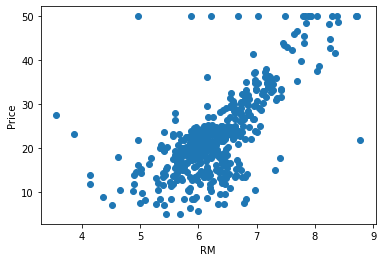

In [ ]:
# Visualise the data
plt.scatter(X,y)
plt.xlabel('RM')
plt.ylabel('Price')

In [ ]:
# Initiate a linear model
model = linear_model.LinearRegression()

# Train the model
model.fit(X,y) # calling a learning algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Price', '=',model.coef_,'* RM','+',model.intercept_)

Price = [9.10210898] * RM + -34.67062077643857


In [ ]:
y_pred = model.coef_ * X + model.intercept_

Text(0, 0.5, 'Price')

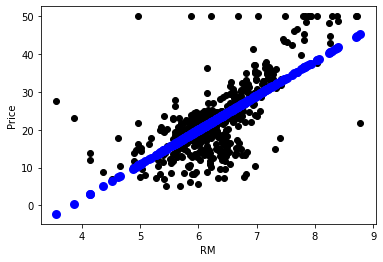

In [ ]:
plt.scatter(X, y,  color='black')
plt.scatter(X, y_pred, color='blue', linewidth=3)
plt.xlabel('RM')
plt.ylabel('Price')

In [ ]:
# Make a prediction
print(model.coef_ * 7 + model.intercept_)

[29.04414209]


In [ ]:
print(model.predict([[7]])) 

[29.04414209]


In [ ]:
#Todo: Make predictions for all samples using the `predict` function

**Challenge**: Try to model each of the other features. Compare and discuss the results

# Improve your model

### Improve your model by adding more features

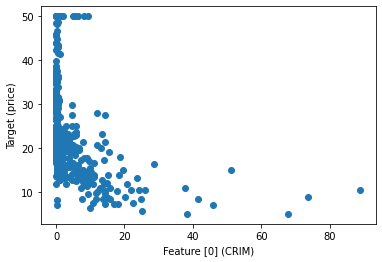

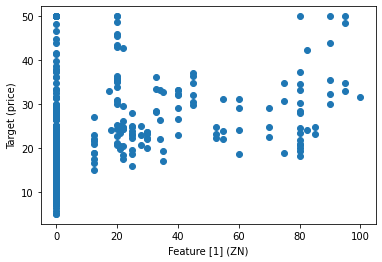

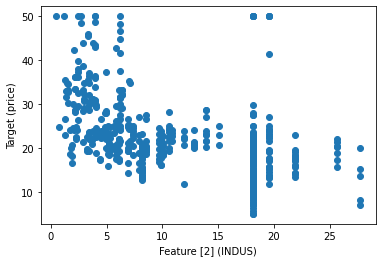

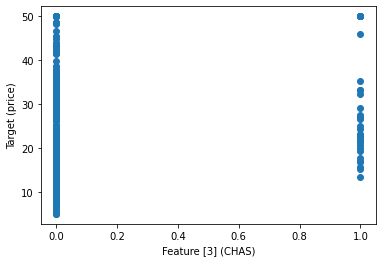

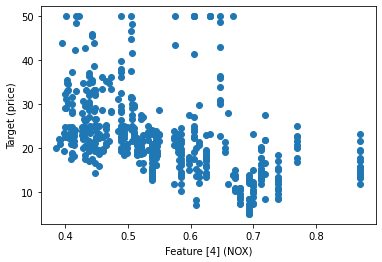

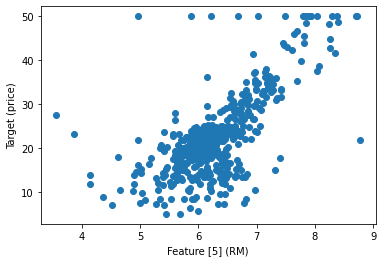

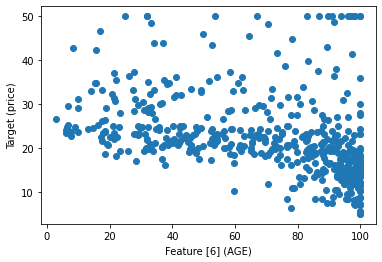

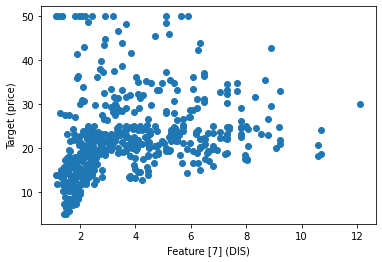

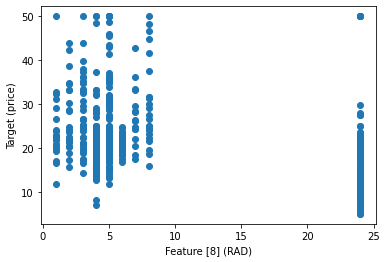

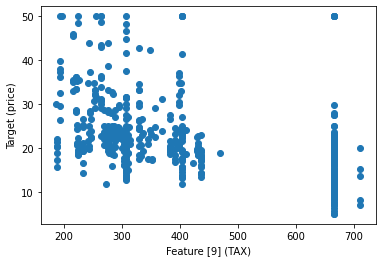

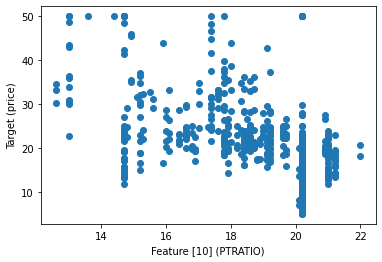

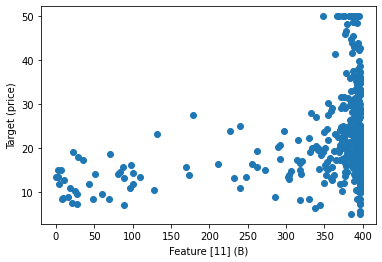

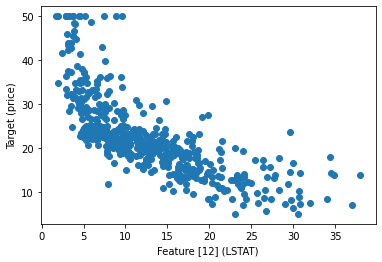

In [ ]:
# Visualise the data
for i in range(dataset['data'].shape[1]):
  X = dataset['data'][:,[i]]
  y = dataset['target']
  fig,ax = plt.subplots()
  ax.scatter(X,y)
  ax.set_ylabel('Target (price)')
  ax.set_xlabel('Feature [' + str(i) + '] ' + '('+dataset['feature_names'][i]+')')

In [ ]:
# Prepare the data
X = dataset['data'][:,[5,12]]
y = dataset['target']

# Initiate a linear model
model_2features = linear_model.LinearRegression()
# Train the model
model_2features.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Price', '=',model_2features.coef_[0],'* RM + ',model_2features.coef_[1],'* LSTAT','+',model_2features.intercept_)

Price = 5.094787984336545 * RM +  -0.6423583342441294 * LSTAT + -1.358272811874489


In [ ]:
# Make a prediction
RM = 7
LSTAT = 2
print(model_2features.predict([[RM,LSTAT]]))

[33.02052641]


**Challenge**:Try all features and interpret the learned weights.

### Improve your model by transforming the feature(s)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Prepare the data
y = dataset['target']
X = dataset['data'][:,[5]]


In [ ]:
poly2 = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
X_poly2 = poly2.fit_transform(X)

In [ ]:
X_poly2

array([[ 6.575   , 43.230625],
       [ 6.421   , 41.229241],
       [ 7.185   , 51.624225],
       ...,
       [ 6.976   , 48.664576],
       [ 6.794   , 46.158436],
       [ 6.03    , 36.3609  ]])

In [ ]:
# Initiate a linear model
model_poly2 = linear_model.LinearRegression(normalize=True)
# Train the model
model_poly2.fit(X_poly2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Text(0, 0.5, 'Price')

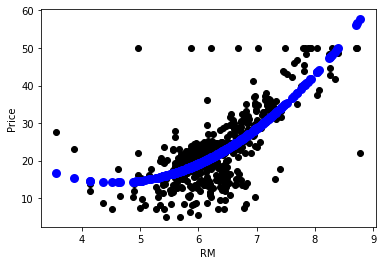

In [ ]:
# Visualise the output
plt.scatter(X, y,  color='black')
plt.scatter(X, model_poly2.predict(X_poly2), color='blue', linewidth=3)
plt.xlabel('RM')
plt.ylabel('Price')

In [ ]:
print(model_poly2.coef_,model_poly2.intercept_)

[-22.64326237   2.47012384] 66.05884748479411


In [ ]:
# Make a prediction
new_X = [[7]]
new_X_transformed = poly2.transform(new_X)
model_poly2.predict(new_X_transformed)

array([28.59207922])

In [ ]:
# Todo: What is the learned linear equation like? 
# Try to make the prediction again by hands.

**Challenge**: Improve your model a bit more.

## Model evaluation and model selection

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from collections import OrderedDict

In [ ]:
# Used in the cross-validaiton below 
# to ensure that the random splits will be reproducible.
RAND_STATE = 1234 

In [ ]:
# Prepare the data
X = dataset['data'][:,[12]] # use LSAT as a feature
y = dataset['target']

In [ ]:
errors_train = OrderedDict() # Dict of erros measured in training sets
errors_val = OrderedDict() # Dict of erros measured in validation sets
poly = OrderedDict() # Dict of transfomers
models = OrderedDict() # Dict of models

In [ ]:
for deg in range(1,13):
  model_name = 'poly'+str(deg)
  poly[model_name] = PolynomialFeatures(degree=deg, include_bias=False) 

  # Cross-validation
  errors_train[model_name] = []
  errors_val[model_name] = []
  kf = KFold(n_splits=5,shuffle=True,random_state=RAND_STATE)
  for train_index, val_index in kf.split(X):
    # Split the data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Preprocess the data
    X_train_poly = poly[model_name].fit_transform(X_train)
    X_val_poly = poly[model_name].transform(X_val)

    # Initiate a linear model
    model = linear_model.LinearRegression(normalize=True) 
    # Train the model
    model.fit(X_train_poly,y_train)

    models[model_name] = model

    # Evaluate on the training set
    y_train_pred = model.predict(X_train_poly)
    mse = mean_squared_error(y_train,y_train_pred)
    errors_train[model_name].append(mse)

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val_poly)
    mse = mean_squared_error(y_val,y_val_pred)
    errors_val[model_name].append(mse)


Text(0, 0.5, 'MSE')

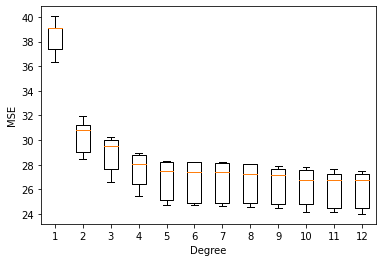

In [ ]:
# Plot training errors
bp_train = plt.boxplot(errors_train.values())
plt.xlabel('Degree')
plt.ylabel('MSE')


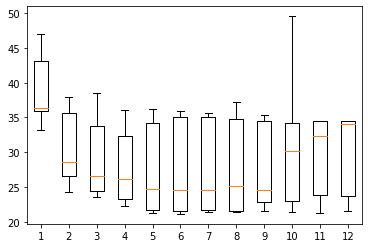

In [ ]:
# Plot validation errors
bp_val = plt.boxplot(errors_val.values(),showfliers=False)

Text(0, 0.5, 'MSE Average')

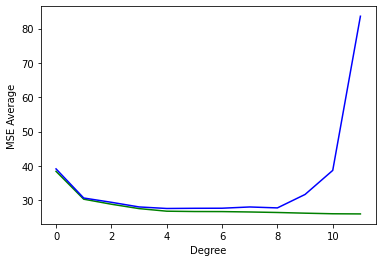

In [ ]:
# Plot the training error mean and the validation error mean
mse_means_train = []
for model_name,errors in errors_train.items():
  mse_means_train += [np.mean(errors)]

mse_means_val = []
for model_name,errors in errors_val.items():
  mse_means_val += [np.mean(errors)]

_ = plt.plot(mse_means_train,c='g')
_ = plt.plot(mse_means_val,c='b')
plt.xlabel('Degree')
plt.ylabel('MSE Average')

Text(0, 0.5, 'Price')

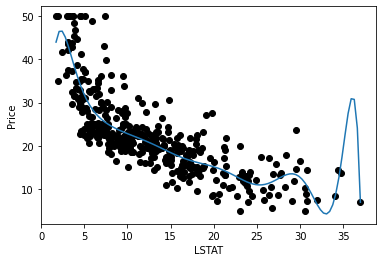

In [ ]:
# The 12-th degree polynomial model
model_name = 'poly12'

fig,ax = plt.subplots()
ax.scatter(X_train,y_train,c='black')
X_model = np.linspace(start=min(X_train), stop=max(X_train), num=100).reshape([100,1])
ax.plot(X_model,models[model_name].predict(poly[model_name].transform(X_model)))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')


Text(0, 0.5, 'Price')

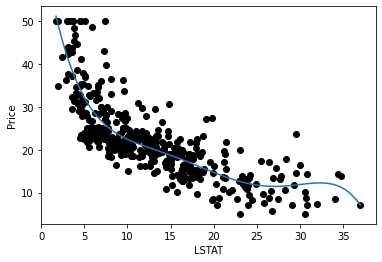

In [ ]:
# The 5-th degree polynomial model
model_name = 'poly5'

fig,ax = plt.subplots()
ax.scatter(X_train,y_train,c='black')
X_model = np.linspace(start=min(X_train), stop=max(X_train), num=100).reshape([100,1])
ax.plot(X_model,models[model_name].predict(poly[model_name].transform(X_model)))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')

**Challenge**: Investigate the learned weights of the 12th-degree polynomial model.

## Regularization

In [ ]:
# Prepare the data
X = dataset['data'][:,[12]]
y = dataset['target']

errors_train = OrderedDict()
errors_val = OrderedDict()
poly = OrderedDict()
models = OrderedDict()
for deg in range(1,13):
  model_name = 'poly'+str(deg)

  poly[model_name] = PolynomialFeatures(degree=deg, include_bias=False)

  # Cross-validation
  errors_train[model_name] = []
  errors_val[model_name] = []

  kf = KFold(n_splits=5,shuffle=True,random_state=RAND_STATE)

  for train_index, val_index in kf.split(X):

    # Split the data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Preprocess the data
    X_train_poly = poly[model_name].fit_transform(X_train)
    X_val_poly = poly[model_name].transform(X_val)

    # Initiate a linear model
    model = linear_model.Ridge(alpha=0.001,normalize=True) # Todo: Try with normalize = False, then discuss
    # Train the model
    model.fit(X_train_poly,y_train)

    models[model_name] = model

    # Evaluate on the training set
    y_train_pred = model.predict(X_train_poly)
    mse = mean_squared_error(y_train,y_train_pred)
    errors_train[model_name].append(mse)

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val_poly)
    mse = mean_squared_error(y_val,y_val_pred)
    errors_val[model_name].append(mse)

Text(0, 0.5, 'MSE Average')

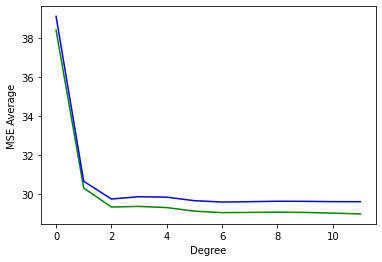

In [ ]:
# Plot the training error mean and the validation error mean
mse_means_train = []
for model_name,errors in errors_train.items():
  mse_means_train += [np.mean(errors)]

mse_means_val = []
for model_name,errors in errors_val.items():
  mse_means_val += [np.mean(errors)]

_ = plt.plot(mse_means_train,c='g')
_ = plt.plot(mse_means_val,c='b')

plt.xlabel('Degree')
plt.ylabel('MSE Average')

Text(0, 0.5, 'Price')

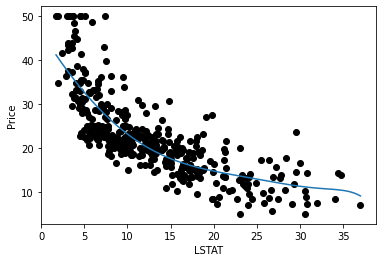

In [ ]:
# The 12-th degree polynomial model
model_name = 'poly12'
fig,ax = plt.subplots()
ax.scatter(X_train,y_train,c='black')
X_model = np.linspace(start=min(X_train), stop=max(X_train), num=100).reshape([100,1])
ax.plot(X_model.flatten(),models[model_name].predict(poly[model_name].transform(X_model)))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')

In [ ]:
# Investigate the learned weights of all the models.
import pandas as pd
coefs = []
model_names = ['poly'+str(deg) for deg in range(1,13)]
for model_name in model_names:
  coefs += [models[model_name].coef_]

df_coefs = pd.DataFrame(coefs).transpose()
df_coefs.columns = model_names
df_coefs


,poly1,poly2,poly3,poly4,poly5,poly6,poly7,poly8,poly9,poly10,poly11,poly12
0,-0.963511,-2.319713,-3.043309,-2.978417,-2.971777e+00,-3.047786e+00,-3.080051e+00,-3.076685e+00,-3.074142e+00,-3.085060e+00,-3.104676e+00,-3.124487e+00
1,NaN,0.042897,0.094503,0.072656,7.212805e-02,7.479888e-02,7.369540e-02,7.202390e-02,7.173360e-02,7.254147e-02,7.357391e-02,7.425422e-02
2,NaN,NaN,-0.001021,0.000432,4.269918e-04,6.268583e-04,7.826546e-04,8.237334e-04,8.239620e-04,8.359102e-04,8.687586e-04,9.112153e-04
3,NaN,NaN,NaN,-0.000026,-2.505796e-05,-2.648163e-05,-2.139960e-05,-1.805026e-05,-1.765446e-05,-1.839242e-05,-1.882919e-05,-1.853438e-05
4,NaN,NaN,NaN,NaN,-2.834810e-08,-6.559947e-07,-7.802341e-07,-7.252183e-07,-7.108955e-07,-7.551220e-07,-8.154611e-07,-8.595007e-07
5,NaN,NaN,NaN,NaN,NaN,1.411451e-08,-5.340932e-09,-8.690632e-09,-8.614324e-09,-9.665495e-09,-1.190682e-08,-1.431982e-08
6,NaN,NaN,NaN,NaN,NaN,NaN,4.728644e-10,1.446896e-10,1.250555e-10,1.328950e-10,9.648818e-11,2.869618e-11
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.650524e-12,7.194313e-12,9.326328e-12,1.037116e-11,9.730025e-12
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188180e-14,1.743139e-13,2.946595e-13,3.477323e-13
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.146884e-15,2.477503e-15,6.801131e-15


**Challenge**: Fine-tue both `deg` and `alpha`; What deg and alpha do you choose?

## Evaluation metrics

In [ ]:
from sklearn.model_selection import train_test_split
deg = 5
alpha = 0.001

# Prepare the data
X = dataset['data'][:,[12]]
y = dataset['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND_STATE)

# Preprocess the data
poly = PolynomialFeatures(degree=deg, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)

# Initiate a linear model
model = linear_model.LinearRegression(normalize=True)
# Train the model
model.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

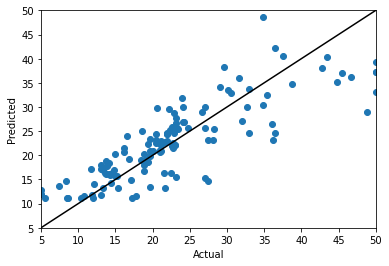

In [ ]:
# Scatter plot between the actual and predicted values.
y_test_pred = model.predict(poly.transform(X_test))
min_ = min(y_test.min(),y_test_pred.min())
max_ = max(y_test.max(),y_test_pred.max())
plt.scatter(y_test,y_test_pred)
plt.xlim([min_,max_])
plt.ylim([min_,max_])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min_, max_], [min_, max_], c='k')

In [ ]:
from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
nrmse = rmse/np.mean(y_train)
# Notice that we use the y_train statistics because we never know the actual target values of the test set.
r2 = metrics.r2_score(y_test,y_test_pred)
print(mse,rmse,nrmse,r2)


32.07517241493047 5.663494717480583 0.2531715671685528 0.6863498184545717
